# Distributed Computing with Dask: Step-by-step Exercise

Mahdi Farnaghi and Mahdi Khodadadzadeh

October 2024


**Objective: Explore distributed computing concepts using Dask for Exploratory Data Analysis (EDA).**

## Dataset

### Description 

In this exercise, we will be using the **Iris dataset**, one of the most well-known datasets in data science. The Iris dataset contains 150 samples from three species of Iris flowers: *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each sample has four features:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

These features describe the physical characteristics of the flowers, which are used to classify the species. The dataset is widely used for classification tasks and exploratory data analysis (EDA).

---

### Dataset Columns:

- **sepal length**: Length of the sepal (in cm).
- **sepal width**: Width of the sepal (in cm).
- **petal length**: Length of the petal (in cm).
- **petal width**: Width of the petal (in cm).
- **species**: The species of the Iris flower (*Iris setosa*, *Iris virginica*, or *Iris versicolor*).

---

We will use this dataset to explore how Dask can be applied to distributed computing tasks for data analysis.

---

## Installation

In [1]:
# !pip install -q "dask[distributed]" --upgrade 
# !pip install -q dask[dataframe]
# !pip install -q scipy

## Step 1: Setting up the Dask Client

Task: Initialize a Dask Client to enable parallel and distributed computing.

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 28.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40733,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 28.00 GiB
Comm: tcp://127.0.0.1:44735,Total threads: 2
Dashboard: http://127.0.0.1:42427/status,Memory: 7.00 GiB
Nanny: tcp://127.0.0.1:36107,


## Step 2: Load the dataset using Dask

Task: Load the Iris dataset using `dask.read_csv`.

Instruction: Use Dask's `read_csv` to load the Iris dataset. This is similar to how you use `pandas.read_csv`. Print the first 5 rows of the dataset.

In [3]:

# dask.config.set(scheduler='single-threaded')

In [4]:
import dask
import dask.dataframe as dd

filename = "EDA_iris.txt"
df = dd.read_csv(filename, sep=",", header=None)
df.columns = ["sepal length","sepal width","petal length","petal width","species"]
df.head(5)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: Set the Index

Task: Set the species as the index for the dataframe.

Instruction: Change the index of the dataframe to 'species' and check how the dataset looks after the change.

In [5]:
df.set_index("species")
df.head(10)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Step 6: Getting Data Information

Task: Retrieve information about the dataframe's columns and types.

Instruction: Use .info() to explore the dataframe's structure.

In [6]:
df.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sepal length  150 non-null      float64
 1   sepal width   150 non-null      float64
 2   petal length  150 non-null      float64
 3   petal width   150 non-null      float64
 4   species       150 non-null      object
dtypes: object(1), float64(4)
memory usage: 6.0 KB


Task: Compute descriptive statistics for the dataset.

Instruction: Use .describe() to calculate statistics for each column and ensure that you trigger computation with .compute().

In [7]:
df.describe().compute()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 4: Slicing the Dataset

Task: Perform slicing on the dataframe to select specific rows.

Instruction: Select a few rows from the dataframe and compute them using Dask's parallel computation.

In [8]:
df.loc[1:3].compute()


,sepal length,sepal width,petal length,petal width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


## Step 5: Mean, Quantiles, and Variance

Task: Compute the mean, quantiles, and variance of the dataset.

Instruction: Calculate the mean, quantiles, and variance of the dataset.

In [9]:
df.mean(numeric_only=True).compute()

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

In [10]:
df.quantile(q=[0.25,0.5,0.75],numeric_only=True).compute()

,sepal length,sepal width,petal length,petal width
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


In [11]:
df.var(numeric_only=True).compute()

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

## Step 6: Data Visualization

Task: Visualize the distribution of columns using histograms and density plots.

Instruction: Plot the histogram and kernel density estimate (KDE) for the 'sepal length' column.

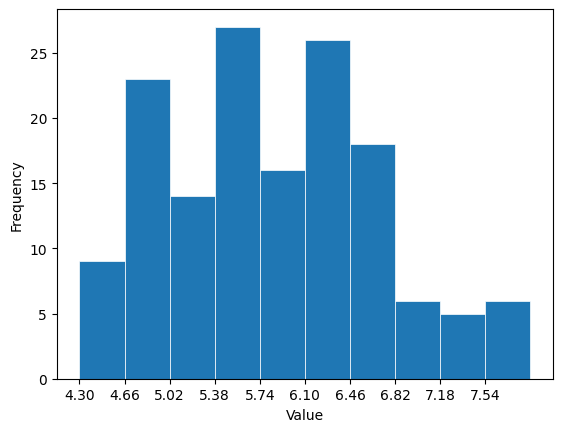

In [12]:
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np

a = df.loc[:,["sepal length"]].to_dask_array().compute()

fig, ax = plt.subplots()

ax.hist(a, bins=10, linewidth=0.5, edgecolor="white")

tick = (a.max()-a.min())/10
tick_array = np.arange(a.min(),a.max(),tick)

plt.xticks(tick_array)
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

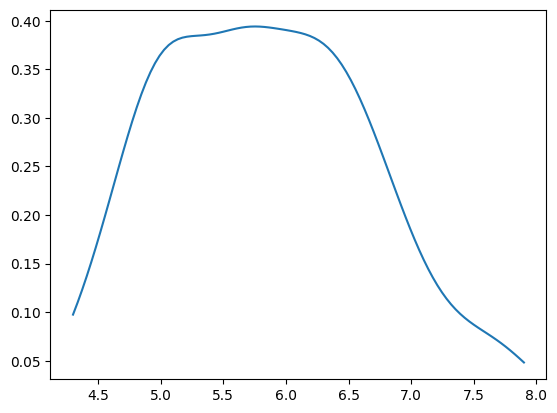

In [13]:
from scipy.stats import gaussian_kde

a_list = []

for i in range(len(a)):
    a_list.append(a[i][0])


kde = gaussian_kde(a_list)

xs = np.linspace(min(a_list) ,max(a_list), 100)

fig, ax = plt.subplots()
ax.plot(xs, kde.evaluate(xs))

plt.show()


## Step 7: Pie and Bar Charts

Task: Create a pie chart and bar chart based on species count.

Instruction: Visualize the species distribution using a pie chart and a bar chart.

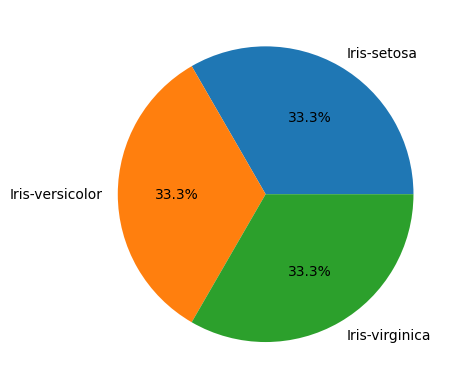

In [14]:
species = df["species"].value_counts().compute()

label = species.index

fig, axp = plt.subplots()

axp.pie(species,labels = label,autopct='%1.1f%%')

plt.show()


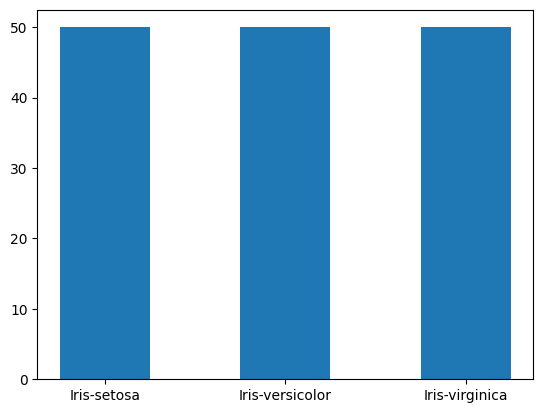

In [15]:
fig, axb = plt.subplots()

axb.bar(label, species, width = 0.5)

plt.show()

## Step 8: Covariance and Correlation

Task: Compute the covariance and correlation of the dataset.

Instruction: Calculate and display the covariance and correlation between columns.

In [16]:
df.cov().compute()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [17]:
df.corr().compute()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## Step 8: Boxplot and Scatterplot

Task: Create a boxplot and scatterplot of the dataset.

Instruction: Generate a boxplot and scatterplot to explore the data distribution.

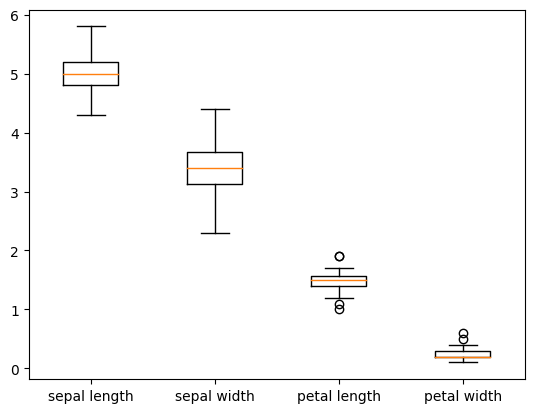

In [18]:
setosa = df[df["species"] == "Iris-setosa"].iloc[:,0:-1] #select one species
setsa_array = setosa.to_dask_array().compute()

fig, ax = plt.subplots()

label = setosa.columns

ax.boxplot(setsa_array)
ax.set_xticklabels(label)

plt.show()


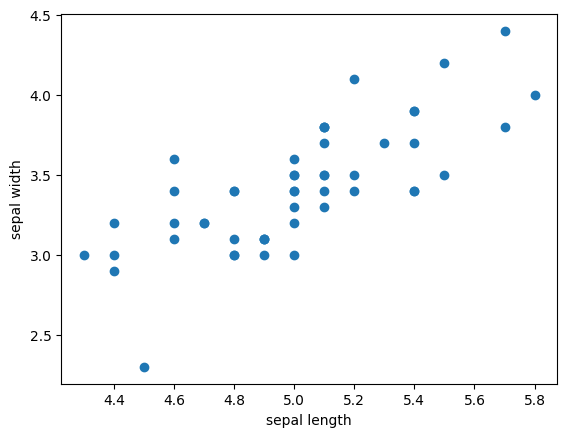

In [19]:
fig, ax = plt.subplots()

ax.scatter(setosa["sepal length"], setosa["sepal width"])

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## Step 9: Advanced Plots (3D and Hexbin)

Task: Create advanced visualizations such as a 3D plot and hexbin plot.

Instruction: Create a 3D scatter plot and a hexbin plot to visualize the relationship between petal length and width.

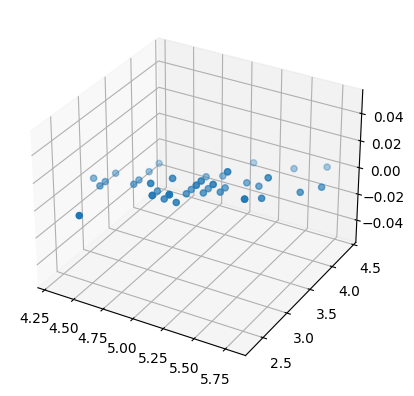

In [22]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(setosa["sepal length"], setosa["sepal width"], zs=0)

plt.show()


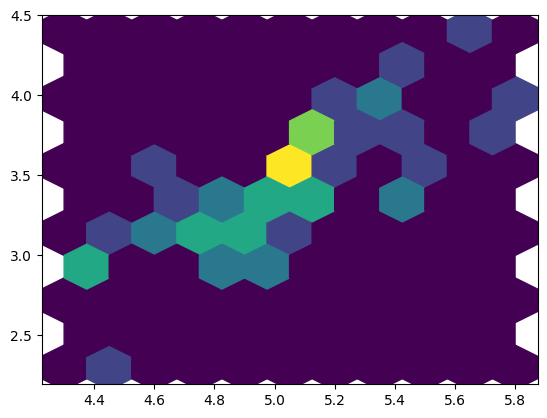

In [30]:
fig, ax = plt.subplots()

ax.hexbin(setosa["sepal length"], setosa["sepal width"],gridsize=10)

plt.show()

## Final Step: Closing the Dask Client

Task: Properly close the Dask Client when done.

Instruction: Always remember to close the Dask Client when you're finished with the tasks.